<h1 style="text-align: center;">ŘEŠENÍ<h1>

### Import & config

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
from scipy import optimize

In [2]:
%matplotlib inline

# plt style
color_bg_all = "#495464"
color_bg_plot = "#222831"
color_text = "#ffffff"

plt.style.use('ggplot')

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.facecolor"] = color_bg_all
plt.rcParams["grid.color"] = color_bg_all
plt.rcParams["axes.edgecolor"] = color_bg_all
plt.rcParams["axes.facecolor"] = color_bg_plot
plt.rcParams["text.color"] = color_text
plt.rcParams["xtick.color"] = color_text
plt.rcParams["ytick.color"] = color_text
plt.rcParams["axes.labelcolor"] = color_text

In [3]:
df = pd.read_csv("LifeExpectancyData.csv")

# remove trailing spaces
df = df.rename(columns={"Life expectancy ": "LE"}) # and rename
df = df.rename(columns={" BMI ": "BMI"})
df = df.rename(columns={"Diphtheria ": "Diphtheria"})
df = df.rename(columns={" thinness  1-19 years": "thinness 1-19 years"})
df = df.rename(columns={" thinness 5-9 years": "thinness 5-9 years"})

### Průzkum dat

In [4]:
print("\x1b[31mDATA\x1b[0m")
display( df.head() )

print("\x1b[32mPOPIS\x1b[0m", "\n")
display( df.info() )

print("\x1b[33mSTATISTIKY\x1b[0m", "\n")
display( df.describe() )

DATA


,Country,Year,Status,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


POPIS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   LE                               2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio       

None

STATISTIKY 



,Year,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.nunique()

Country                             193
Year                                 16
Status                                2
LE                                  362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
thinness 1-19 years                 200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

## Předzpracování dat

Odebrání bodů, u kterých neznáme vysvětlovanou proměnnou, takže jsou pro supervizované učení k ničemu.

In [6]:
df = df[df['LE'].notna()]

Rozdělení dat na

- **trénovací** pro natrénování jednotlivých modelů
- **validační** pro porovnávání modelů mezi sebou
- **testovací** pro predikci výkonnosti finálního nejlepšího modelu

podmnožiny.

Dataset obsahuje nestacionární data vyvíjející se v čase. Navíc se dá očekávat, že po výsledném modelu budedeme chtít, aby co nejpřesněji predikoval data nasbíraná v následujících letech na základě dat z let minulých. (Dále bychom mohli například přípravou dat model více zaměřit na to, aby predikoval pro každou zemi samostatně a podobně.)

Dává tedy smysl, abychom k trénování a následné validaci a testování nepoužívali náhodné permutace dat, ale abychom místo toho modely natrénovali na "starších" datech a validovali a testovali na datech "novějších".

Máme k dispozici data z let 2000 až 2015, k trénování použiji data z let **{2000, ..., 2009}** a zbytek rozdělím na validaci a testování následujícím způsobem:
- **{2010, 2011, 2013}** jako validační
- **{2012, 2014, 2015}** jako testovací

In [7]:
df_train = df[ df.Year.isin(range(2000,2010)) ]
df_val   = df[ df.Year.isin([2010, 2011, 2013]) ]
df_test  = df[ df.Year.isin([2012, 2014, 2015]) ]

#### Chybějící hodnoty

Analýza chybějících hodnot (na trénovacích datech).

Pro daný příznak jsem pro každou zemi zvlášť spočítal, v kolika letech celkem tento příznak chyběl.
Pokud je uvedeno číslo 10, znamená, že pro tuto zemi nebyl příznak v testovacích datech zaznamenán vůbec.

Chybějící údaje jsou navíc povětšinou z rozvojových zemí.

In [8]:
def missing_info(df, col1, col2):
    res = {}
    for i in df[df[col1].isna()][col2]:
        if i in res.keys():
            res[i] += 1
        else:
            res[i] = 1
    return res

def missing_info_train(col1, col2):
    return missing_info(df_train, col1, col2)

print( "Alcohol: ", missing_info_train("Alcohol", "Country") )
print( "Hepatitis B: ", missing_info_train("Hepatitis B", "Country") )
print( "Total expenditure: ", missing_info_train("Total expenditure", "Country") )
print( "Schooling: ", missing_info_train("Schooling", "Country") )
print( "Income composition of resources: ", missing_info_train("Income composition of resources", "Country") )
print( "thinness 1-19 years: ", missing_info_train("thinness 1-19 years", "Country") )
print( "thinness 5-9 years: ", missing_info_train("thinness 5-9 years", "Country") )
print( "Population: ", missing_info_train("Population", "Country") )
print( "BMI: ", missing_info_train("BMI", "Country") )
print( "GDP: ", missing_info_train("GDP", "Country") )
print( "Polio: ", missing_info_train("Polio", "Country") )
print( "Diphtheria: ", missing_info_train("Diphtheria", "Country") )

Alcohol:  {'Montenegro': 1, 'South Sudan': 10}
Hepatitis B:  {'Algeria': 4, 'Angola': 7, 'Antigua and Barbuda': 1, 'Argentina': 2, 'Australia': 1, 'Azerbaijan': 2, 'Bahamas': 1, 'Bangladesh': 3, 'Barbados': 1, 'Benin': 2, 'Bosnia and Herzegovina': 4, 'Burkina Faso': 6, 'Burundi': 4, "Côte d'Ivoire": 1, 'Cabo Verde': 2, 'Cambodia': 6, 'Cameroon': 5, 'Canada': 3, 'Central African Republic': 9, 'Chad': 8, 'Chile': 6, 'Comoros': 3, 'Congo': 7, 'Croatia': 7, 'Czechia': 2, "Democratic People's Republic of Korea": 3, 'Democratic Republic of the Congo': 7, 'Denmark': 10, 'Djibouti': 7, 'Equatorial Guinea': 10, 'Eritrea': 2, 'Estonia': 4, 'Ethiopia': 7, 'Finland': 10, 'Gabon': 5, 'Ghana': 2, 'Grenada': 1, 'Guatemala': 5, 'Guinea': 7, 'Guinea-Bissau': 9, 'Guyana': 1, 'Haiti': 10, 'Hungary': 10, 'Iceland': 10, 'India': 4, 'Ireland': 10, 'Jamaica': 3, 'Japan': 10, 'Kenya': 2, "Lao People's Democratic Republic": 3, 'Lesotho': 3, 'Liberia': 8, 'Madagascar': 2, 'Malawi': 2, 'Mali': 3, 'Malta': 3, 'Ma

Nahrazení chybějících hodnot.

Chybějící hodnoty příznaků pro každou zemi zvlášť, kde chybí jen část dat, nahradím průměrem z dané země.
Příznaky, kde není pro danou zemi žádná hodnota vyplním jako -1.

In [9]:
def replace_with_mean(df_src, df_out, country, col):
    m = df_src[df_src.Country == country][col].mean()
    df_out.loc[df_out['Country'] == country, col].replace(np.nan, m, inplace=True)

def replace_with_mean_train(country, col):
    return replace_with_mean(df_train, df_train, country, col)

replace_with_mean_train("Montenegro", "Alcohol")
replace_with_mean_train("Iraq", "Total expenditure")
replace_with_mean_train("Iraq", "GDP")
replace_with_mean_train("Sao Tome and Principe", "GDP")
replace_with_mean_train("South Sudan", "GDP")
replace_with_mean_train("Syrian Arab Republic", "GDP")
replace_with_mean_train("Montenegro", "Polio")
replace_with_mean_train("Timor-Leste", "Polio")
replace_with_mean_train("Montenegro", "Diphtheria")
replace_with_mean_train("Timor-Leste", "Diphtheria")

for k,v in missing_info_train("Hepatitis B", "Country").items():
    if v != 10:
        replace_with_mean_train(k, "Hepatitis B")

# zbytek bude -1
df_train.replace(np.nan, -1, inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Ještě "znormalizuji" hodnoty příznaku "Year" tím, že ode všech hodnot odečtu 2000, abychom stále měli informaci o jakém roce hodnoty ostatních příznaků hovoří, ale aby tato informace neměla takovou váhu danou vysokou hodnotou.

In [10]:
df_train.Year = df_train.Year - 2000

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Nečíselné příznaky

Oba nečíselné příznaky (Country a Status) jsou kategorické.
- Country zakóduji pomocí hot one encodingu
- pro Status zvolím kategorické kódování s uspořádáním

In [11]:
string_cols = df_train.select_dtypes(['object']).columns
print("Nečíselné příznaky jsou: ", string_cols)

country_dummies = pd.get_dummies(df["Country"])
df_train = pd.concat([df_train, country_dummies], axis=1).reindex(df_train.index).drop("Country", axis=1)
#df_train["Country"] = df_train[["Country"]].astype('category').apply(lambda x: x.cat.codes)

status_category = CategoricalDtype(categories=['Developing', 'Developed'], ordered=True)
df_train["Status"] = df_train["Status"].astype(status_category).cat.codes

Nečíselné příznaky jsou:  Index(['Country', 'Status'], dtype='object')


## Trénování

#### Příprava dat

Nejdříve připravím validační a testovací množinu analogicky k trénovací

Doplnění chybějících dat napočteným průměrem z trénovacích dat tam, kde to jde a doplnění -1 jinde.

In [12]:
df_tmp = df[ df.Year.isin(range(2000,2010)) ] # dočasný df_train, protože ten pravý nemá už příznak Country

# pro df_val
cols_with_nan = df_val.columns[df_val.isna().any()].tolist()
for col in cols_with_nan:
    for country,v in missing_info(df_val, col, "Country").items():
        if v != 10:
            print(f"Replacing {col} nans in {country}")
            replace_with_mean(df_tmp, df_val, country, col)

df_val.replace(np.nan, -1, inplace=True)

# pro df_test
cols_with_nan = df_test.columns[df_test.isna().any()].tolist()
for col in cols_with_nan:
    for country,v in missing_info(df_test, col, "Country").items():
        if v != 10:
            print(f"Replacing {col} nans in {country}")
            replace_with_mean(df_tmp, df_test, country, col)

df_test.replace(np.nan, -1, inplace=True)

Replacing Alcohol nans in South Sudan
Replacing Hepatitis B nans in Denmark
Replacing Hepatitis B nans in Equatorial Guinea
Replacing Hepatitis B nans in Finland
Replacing Hepatitis B nans in Haiti
Replacing Hepatitis B nans in Hungary
Replacing Hepatitis B nans in Iceland
Replacing Hepatitis B nans in Japan
Replacing Hepatitis B nans in Netherlands
Replacing Hepatitis B nans in Norway
Replacing Hepatitis B nans in Slovenia
Replacing Hepatitis B nans in Somalia
Replacing Hepatitis B nans in South Sudan
Replacing Hepatitis B nans in Sweden
Replacing Hepatitis B nans in Switzerland
Replacing Hepatitis B nans in United Kingdom of Great Britain and Northern Ireland
Replacing BMI nans in South Sudan
Replacing BMI nans in Sudan
Replacing Polio nans in South Sudan
Replacing Total expenditure nans in Democratic People's Republic of Korea
Replacing Total expenditure nans in Somalia
Replacing Total expenditure nans in South Sudan
Replacing Diphtheria nans in South Sudan
Replacing GDP nans in Bah

Převod nečíselných příznaků.

In [13]:
df_val = pd.concat([df_val, country_dummies], axis=1).reindex(df_val.index).drop("Country", axis=1)
df_test = pd.concat([df_test, country_dummies], axis=1).reindex(df_test.index).drop("Country", axis=1)
#df_val["Country"] = df_val[["Country"]].astype('category').apply(lambda x: x.cat.codes)
#df_test["Country"] = df_test[["Country"]].astype('category').apply(lambda x: x.cat.codes)

df_val["Status"] = df_val["Status"].astype(status_category).cat.codes
df_test["Status"] = df_test["Status"].astype(status_category).cat.codes

df_val.Year = df_val.Year - 2000
df_test.Year = df_test.Year - 2000

Teď už jen finální rozdělení dat

In [14]:
Xtrain, ytrain = df_train.drop("LE", axis=1), df_train.LE
Xval, yval = df_val.drop("LE", axis=1), df_val.LE
Xtest, ytest = df_test.drop("LE", axis=1), df_test.LE

#### Evaluace

Jako první **Lineární regrese**

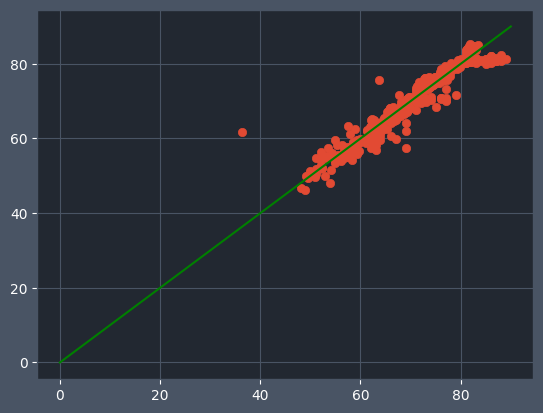

RMSE pro lineární regresi: 2.463765316972257
 MAE pro lineární regresi: 1.5883741483007738


In [15]:
clf_linreg = LinearRegression()

clf_linreg.fit(Xtrain,ytrain)
Ylinreg = clf_linreg.predict(Xval)

RMSE_linreg = mean_squared_error(np.array(yval), Ylinreg, squared=False)
MAE_linreg = mean_absolute_error(np.array(yval), Ylinreg)

# show results
plt.scatter(yval, Ylinreg)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('RMSE pro lineární regresi:', RMSE_linreg)
print(' MAE pro lineární regresi:', MAE_linreg)


A následně **Hřebenová regrese**

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.12142e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


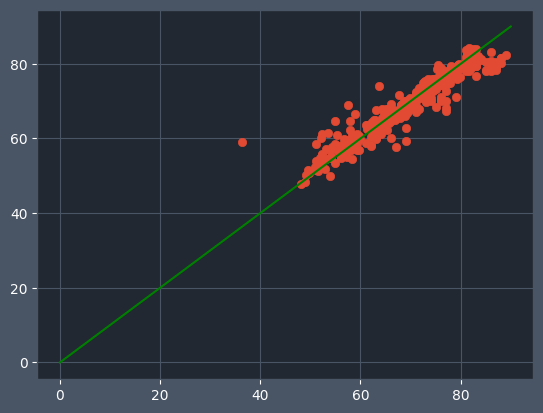

RMSE pro hřebenovou regresi: 2.6892296596252847
 MAE pro hřebenovou regresi: 1.656414162886367


In [16]:
clf_ridge = Ridge(1)

clf_ridge.fit(Xtrain, ytrain)
Yridge = clf_ridge.predict(Xval)

RMSE_ridge = mean_squared_error(np.array(yval), Yridge, squared=False)
MAE_ridge = mean_absolute_error(np.array(yval), Yridge)

# show results
plt.scatter(yval, Yridge)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('RMSE pro hřebenovou regresi:', RMSE_ridge)
print(' MAE pro hřebenovou regresi:', MAE_ridge)


Naměřené chyby ukazují, že nepatrně lepších výsledků dosahuje lineární regrese.

Jako poslední zkusíme **Lasso**, tedy L1 regularizaci

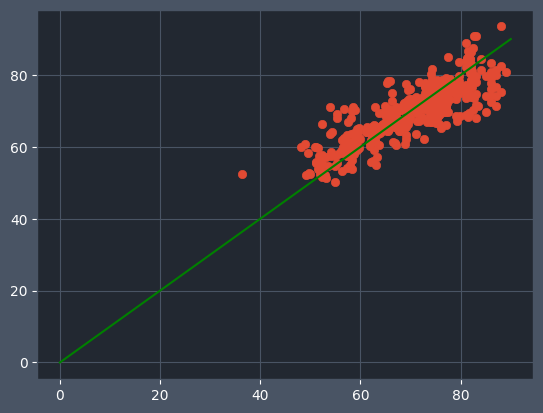

RMSE pro lasso: 4.927667487450399
 MAE pro lasso: 3.6689434965240673


In [17]:
clf_lasso = Lasso(alpha = 5, max_iter = 10000)

clf_lasso.fit(Xtrain, ytrain)
Ylasso = clf_lasso.predict(Xval)

RMSE_lasso = mean_squared_error(np.array(yval), Ylasso, squared=False)
MAE_lasso = mean_absolute_error(np.array(yval), Ylasso)

# show results
plt.scatter(yval, Ylasso)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('RMSE pro lasso:', RMSE_lasso)
print(' MAE pro lasso:', MAE_lasso)

Zatím výrazně nejhorší výsledek.

## Vylepšení modelů

#### Ladění hyperparametrů

Nejdříve naleznu optimální koeficient lambda pro hřebenovou regresi pomocí funkce ze cvičení a upravím ji i pro Lasso.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.45666e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.81187e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.12152e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59182e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/py

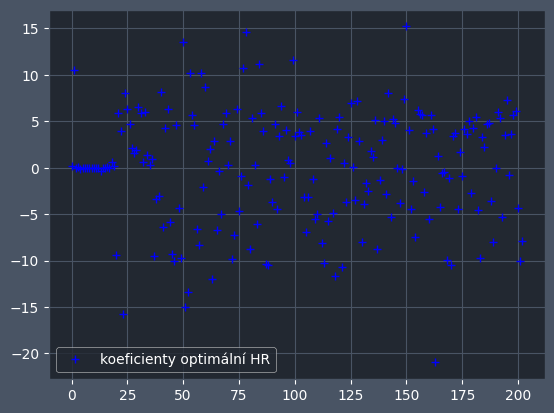

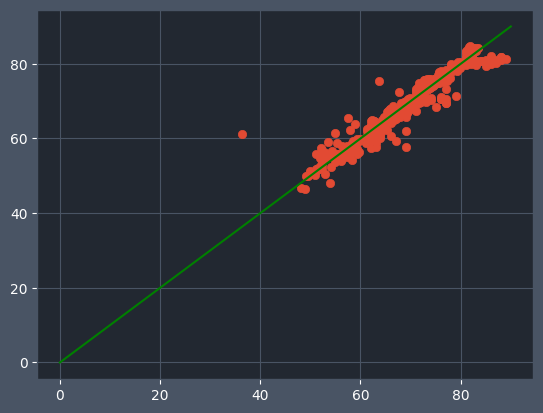

RMSE pro hřebenovou regresi po nalezení optimální lambdy: 2.4557407967618894
 MAE pro hřebenovou regresi po nalezení optimální lambdy: 1.51006883957881
--------------------------------------------------
RMSE pro původní lineární regresi: 2.463765316972257
 MAE pro původní lineární regresi: 1.5883741483007738


In [18]:
def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(Xval), squared = False)

    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 300}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha: ', opt_alpha)
    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge


clf_ridge_optimal = get_opt_ridge_model(Xtrain, Xval)
Yridgeopt = clf_ridge_optimal.predict(Xval)

RMSE_ridge_optimal = mean_squared_error(np.array(yval), Yridgeopt, squared=False)
MAE_ridge_optimal = mean_absolute_error(np.array(yval), Yridgeopt)

# show results
plt.plot(clf_ridge_optimal.coef_, 'b+', label="koeficienty optimální HR")
plt.legend()
plt.show()

plt.scatter(yval, Yridgeopt)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('RMSE pro hřebenovou regresi po nalezení optimální lambdy:', RMSE_ridge_optimal)
print(' MAE pro hřebenovou regresi po nalezení optimální lambdy:', MAE_ridge_optimal)
print("-"*50)
print('RMSE pro původní lineární regresi:', RMSE_linreg)
print(' MAE pro původní lineární regresi:', MAE_linreg)


Vidíme, že výsledky pro hřebenovou regresi se oproti původní volbě lambdy zlepšíli a jsou dokonce lepší než u lineární regrese.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.121e+01, tolerance: 1.778e+01
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.558e+01, tolerance: 1.778e+01
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

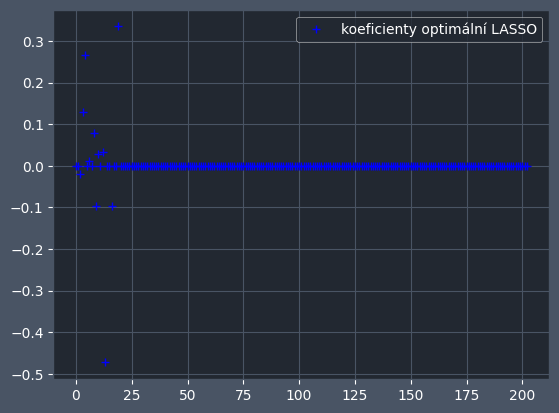

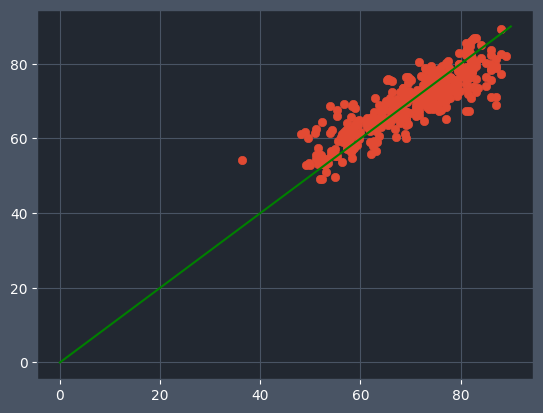

RMSE pro lasso po nalezení optimální lambdy: 4.479062174176847
 MAE pro lasso po nalezení optimální lambdy: 3.3314894200522014


In [19]:
def get_opt_lasso_model(Xtrain, Xval):
    def lassomodel_eval(alpha):
        clf = Lasso(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(Xval), squared = False)

    opt_alpha = optimize.minimize_scalar(lassomodel_eval, options = {'maxiter': 1000}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha: ', opt_alpha)
    clf_opt_lasso = Lasso(alpha = opt_alpha.x)
    clf_opt_lasso.fit(Xtrain, ytrain)
    return clf_opt_lasso


clf_lasso_optimal = get_opt_lasso_model(Xtrain, Xval)
Ylassoopt = clf_lasso_optimal.predict(Xval)

RMSE_lasso_optimal = mean_squared_error(np.array(yval), Ylassoopt, squared=False)
MAE_lasso_optimal = mean_absolute_error(np.array(yval), Ylassoopt)

# show results
plt.plot(clf_lasso_optimal.coef_, 'b+', label="koeficienty optimální LASSO")
plt.legend()
plt.show()

plt.scatter(yval, Ylassoopt)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('RMSE pro lasso po nalezení optimální lambdy:', RMSE_lasso_optimal)
print(' MAE pro lasso po nalezení optimální lambdy:', MAE_lasso_optimal)

Zde je také výkon lepší než u původní volby parametrů, o nejlepší model se ale nejedná.

#### Normalizace

Hledání optimální lambdy výše hlásí warning, protože hodnoty napříč příznaky jsou příliš rozptýlené.
Zkusím tedy data normalizovat.

In [20]:
# normalizace pomocí standardizace
display("Standardizace")
scaler = StandardScaler().fit(Xtrain)
Xtrain_standard = scaler.transform(Xtrain)
Xval_standard = scaler.transform(Xval)

clf_opt_ridge = get_opt_ridge_model(Xtrain_standard, Xval_standard)

RMSE_ridge_optimal_st = mean_squared_error(yval, clf_opt_ridge.predict(Xval_standard), squared = False)
MAE_ridge_optimal_st = mean_absolute_error(yval, clf_opt_ridge.predict(Xval_standard))

print('RMSE pro hřebenovou regresi po standardizaci a nalezení optimální lambdy: ', RMSE_ridge_optimal_st)
print(' MAE pro hřebenovou regresi po standardizaci a nalezení optimální lambdy: ', MAE_ridge_optimal_st)

# normalizace pomocí minmax normalizace
display("MinMax normalizace")
scaler = MinMaxScaler().fit(Xtrain)
Xtrain_minmax = scaler.transform(Xtrain)
Xval_minmax = scaler.transform(Xval)

clf_opt_ridge = get_opt_ridge_model(Xtrain_minmax, Xval_minmax)

RMSE_ridge_optimal_mm = mean_squared_error(yval, clf_opt_ridge.predict(Xval_minmax), squared = False)
MAE_ridge_optimal_mm = mean_absolute_error(yval, clf_opt_ridge.predict(Xval_minmax))

print('RMSE pro hřebenovou regresi po minmax normalizaci a nalezení optimální lambdy: ', RMSE_ridge_optimal_mm)
print(' MAE pro hřebenovou regresi po minmax normalizaci a nalezení optimální lambdy: ', MAE_ridge_optimal_mm)

'Standardizace'

Optimal alpha:       fun: 2.4932663122434247
 message: 'Solution found.'
    nfev: 15
     nit: 15
  status: 0
 success: True
       x: 18.61260641715366
RMSE pro hřebenovou regresi po standardizaci a nalezení optimální lambdy:  2.4932663122434247
 MAE pro hřebenovou regresi po standardizaci a nalezení optimální lambdy:  1.537192398657071


'MinMax normalizace'

Optimal alpha:       fun: 2.5005183076250446
 message: 'Solution found.'
    nfev: 38
     nit: 38
  status: 0
 success: True
       x: 0.10000406819977517
RMSE pro hřebenovou regresi po minmax normalizaci a nalezení optimální lambdy:  2.5005183076250446
 MAE pro hřebenovou regresi po minmax normalizaci a nalezení optimální lambdy:  1.5523649597901588


U standardizace tentokrát získáváme o něco lepší MAE než u lineární regrese.

Pro lineární regresi:

In [21]:
display("Standardizace")
clf_linreg_st = LinearRegression()
clf_linreg_st.fit(Xtrain_standard, ytrain)

RMSE_lr_optimal_st = mean_squared_error(yval, clf_linreg_st.predict(Xval_standard), squared = False)
MAE_lr_optimal_st = mean_absolute_error(yval, clf_linreg_st.predict(Xval_standard))

print('RMSE pro lineární regresi po standardizaci: ', RMSE_lr_optimal_st)
print(' MAE pro lineární regresi po standardizaci: ', MAE_lr_optimal_st)

display("MinMax normalizace")

clf_linreg_mm = LinearRegression()
clf_linreg_mm.fit(Xtrain_minmax, ytrain)

RMSE_lr_optimal_mm = mean_squared_error(yval, clf_linreg_mm.predict(Xval_minmax), squared = False)
MAE_lr_optimal_mm = mean_absolute_error(yval, clf_linreg_mm.predict(Xval_minmax))

print('RMSE pro lineární regresi po minmax normalizaci: ', RMSE_lr_optimal_mm)
print(' MAE pro lineární regresi po minmax normalizaci: ', MAE_lr_optimal_mm)

'Standardizace'

RMSE pro lineární regresi po standardizaci:  2.4711854570541423
 MAE pro lineární regresi po standardizaci:  1.602216620000224


'MinMax normalizace'

RMSE pro lineární regresi po minmax normalizaci:  2.4637347568544796
 MAE pro lineární regresi po minmax normalizaci:  1.5883835422536714


A konečně pro Lasso:

In [22]:
display("Standardizace")
clf_lasso_st = get_opt_lasso_model(Xtrain_standard, Xval_standard)

RMSE_lasso_optimal_st = mean_squared_error(yval, clf_lasso_st.predict(Xval_standard), squared = False)
MAE_lasso_optimal_st = mean_absolute_error(yval, clf_lasso_st.predict(Xval_standard))

print('RMSE pro lasso po standardizaci: ', RMSE_lasso_optimal_st)
print(' MAE pro lasso po standardizaci: ', MAE_lasso_optimal_st)

display("MinMax normalizace")
clf_lasso_mm = get_opt_lasso_model(Xtrain_minmax, Xval_minmax)

RMSE_lasso_optimal_mm = mean_squared_error(yval, clf_lasso_mm.predict(Xval_minmax), squared = False)
MAE_lasso_optimal_mm = mean_absolute_error(yval, clf_lasso_mm.predict(Xval_minmax))

print('RMSE pro lasso po minmax normalizaci: ', RMSE_lasso_optimal_mm)
print(' MAE pro lasso po minmax normalizaci: ', MAE_lasso_optimal_mm)

'Standardizace'

Optimal alpha:       fun: 9.218875992375198
 message: 'Solution found.'
    nfev: 36
     nit: 36
  status: 0
 success: True
       x: 399.99998988494315
RMSE pro lasso po standardizaci:  9.218875992375198
 MAE pro lasso po standardizaci:  7.822917475389932


'MinMax normalizace'

Optimal alpha:       fun: 9.218875992375198
 message: 'Solution found.'
    nfev: 36
     nit: 36
  status: 0
 success: True
       x: 399.99998988494315
RMSE pro lasso po minmax normalizaci:  9.218875992375198
 MAE pro lasso po minmax normalizaci:  7.822917475389932


#### Výběr příznaků

Nyní využiji Least Absolute Shrinkage and Selection Operator jako embedded metodu pro výběr parametrů pro co největší trénovací přesnost (co nejmenší chybu).

Alpha (lambda) zvolíl poměrně nízko, aby se vyřadilo pouze malé množství příznaků.

In [23]:
selector = SelectFromModel(estimator=Lasso(alpha = 3, max_iter = 10000)).fit(Xtrain, ytrain)

Xtrainsel = Xtrain.loc[:,selector.get_support()]
Xvalsel = Xval.loc[:,selector.get_support()]
Xtestsel = Xtest.loc[:,selector.get_support()]

print(f"Vybráno {sum(selector.get_support())} příznaků")

Vybráno 13 příznaků


A změřím chybu všech tří regresních modelů s použitím této podmnožiny příznaků.

In [26]:
display("Lineární regrese")
clf_linreg_select = LinearRegression()

clf_linreg_select.fit(Xtrainsel,ytrain)
Ylinregsel = clf_linreg_select.predict(Xvalsel)

RMSE_linreg_select = mean_squared_error(np.array(yval), Ylinregsel, squared=False)
MAE_linreg_select = mean_absolute_error(np.array(yval), Ylinregsel)

print('RMSE pro lineární regresi s vybranými příznaky:', RMSE_linreg_select)
print(' MAE pro lineární regresi s vybranými příznaky:', MAE_linreg_select)

display("Hřebenová regrese")
clf_ridge_optimal_select = get_opt_ridge_model(Xtrainsel, Xvalsel)
Yridgeoptsel = clf_ridge_optimal_select.predict(Xvalsel)

RMSE_ridge_optimal_select = mean_squared_error(np.array(yval), Yridgeoptsel, squared=False)
MAE_ridge_optimal_select = mean_absolute_error(np.array(yval), Yridgeoptsel)

print('RMSE pro hřebenovou regresi s vybranými příznaky:', RMSE_ridge_optimal_select)
print(' MAE pro hřebenovou regresi s vybranými příznaky:', MAE_ridge_optimal_select)

display("Lasso")
clf_lasso_optimal_select = get_opt_lasso_model(Xtrainsel, Xvalsel)
Ylassooptsel = clf_lasso_optimal_select.predict(Xvalsel)

RMSE_lasso_optimal_select = mean_squared_error(np.array(yval), Ylassooptsel, squared=False)
MAE_lasso_optimal_select = mean_absolute_error(np.array(yval), Ylassooptsel)

print('RMSE pro lasso s vybranými příznaky:', RMSE_lasso_optimal_select)
print(' MAE pro lasso s vybranými příznaky:', MAE_lasso_optimal_select)

'Lineární regrese'

RMSE pro lineární regresi s vybranými příznaky: 4.504939594234503
 MAE pro lineární regresi s vybranými příznaky: 3.358861804176235


'Hřebenová regrese'

Optimal alpha:       fun: 4.504939966990447
 message: 'Solution found.'
    nfev: 38
     nit: 38
  status: 0
 success: True
       x: 0.10000406819977517
RMSE pro hřebenovou regresi s vybranými příznaky: 4.504939966990447
 MAE pro hřebenovou regresi s vybranými příznaky: 3.3588620486367424


'Lasso'

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.777e+01, tolerance: 1.778e+01
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.806e+01, tolerance: 1.778e+01
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Výsledky jsou výrazně horší než s použitím předchozích metod a výběrem příznaků jsme si tedy nepomohli.
Můžeme si ale všimnout, že výsledky s použitím všech tří modelů jsou prakticky identické.

## Finální evaluace

Následuje finální evaluace nad dosud nepoužitými testovacími daty s použitím nejlepšího nalezeného modelu.
V následující tabulce jsou vidět všechny výše naměřené chyby

In [32]:
display("RMSE")
print("              RMSE_linreg: ", RMSE_linreg)
print("               RMSE_ridge: ", RMSE_ridge)
print("               RMSE_lasso: ", RMSE_lasso)
print("       RMSE_ridge_optimal: ", RMSE_ridge_optimal, "<----------")
print("       RMSE_lasso_optimal: ", RMSE_lasso_optimal)
print("    RMSE_ridge_optimal_st: ", RMSE_ridge_optimal_st)
print("    RMSE_ridge_optimal_mm: ", RMSE_ridge_optimal_mm)
print("       RMSE_lr_optimal_st: ", RMSE_lr_optimal_st)
print("       RMSE_lr_optimal_mm: ", RMSE_lr_optimal_mm)
print("    RMSE_lasso_optimal_st: ", RMSE_lasso_optimal_st)
print("    RMSE_lasso_optimal_mm: ", RMSE_lasso_optimal_mm)
print("       RMSE_linreg_select: ", RMSE_linreg_select)
print("RMSE_ridge_optimal_select: ", RMSE_ridge_optimal_select)
print("RMSE_lasso_optimal_select: ", RMSE_lasso_optimal_select)

display("MAE")
print("              MAE_linreg: ", MAE_linreg)
print("               MAE_ridge: ", MAE_ridge)
print("               MAE_lasso: ", MAE_lasso)
print("       MAE_ridge_optimal: ", MAE_ridge_optimal, "<----------")
print("       MAE_lasso_optimal: ", MAE_lasso_optimal)
print("    MAE_ridge_optimal_st: ", MAE_ridge_optimal_st)
print("    MAE_ridge_optimal_mm: ", MAE_ridge_optimal_mm)
print("       MAE_lr_optimal_st: ", MAE_lr_optimal_st)
print("       MAE_lr_optimal_mm: ", MAE_lr_optimal_mm)
print("    MAE_lasso_optimal_st: ", MAE_lasso_optimal_st)
print("    MAE_lasso_optimal_mm: ", MAE_lasso_optimal_mm)
print("       MAE_linreg_select: ", MAE_linreg_select)
print("MAE_ridge_optimal_select: ", MAE_ridge_optimal_select)
print("MAE_lasso_optimal_select: ", MAE_lasso_optimal_select)

'RMSE'

              RMSE_linreg:  2.463765316972257
               RMSE_ridge:  2.6892296596252847
               RMSE_lasso:  4.927667487450399
       RMSE_ridge_optimal:  2.4557407967618894 <----------
       RMSE_lasso_optimal:  4.479062174176847
    RMSE_ridge_optimal_st:  2.4932663122434247
    RMSE_ridge_optimal_mm:  2.5005183076250446
       RMSE_lr_optimal_st:  2.4711854570541423
       RMSE_lr_optimal_mm:  2.4637347568544796
    RMSE_lasso_optimal_st:  9.218875992375198
    RMSE_lasso_optimal_mm:  9.218875992375198
       RMSE_linreg_select:  4.504939594234503
RMSE_ridge_optimal_select:  4.504939966990447
RMSE_lasso_optimal_select:  4.50709996028621


'MAE'

              MAE_linreg:  1.5883741483007738
               MAE_ridge:  1.656414162886367
               MAE_lasso:  3.6689434965240673
       MAE_ridge_optimal:  1.51006883957881 <----------
       MAE_lasso_optimal:  3.3314894200522014
    MAE_ridge_optimal_st:  1.537192398657071
    MAE_ridge_optimal_mm:  1.5523649597901588
       MAE_lr_optimal_st:  1.602216620000224
       MAE_lr_optimal_mm:  1.5883835422536714
    MAE_lasso_optimal_st:  7.822917475389932
    MAE_lasso_optimal_mm:  7.822917475389932
       MAE_linreg_select:  3.358861804176235
MAE_ridge_optimal_select:  3.3588620486367424
MAE_lasso_optimal_select:  3.359080461500751


Nejlepších výsledků pro RMSE i MAE dosahuje hřebenová regrese s nalezeným optimálním parametrem.
Tento model tedy použiji pro finální evaluaci nad testovacími daty.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.45666e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.81187e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.12152e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59182e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/py

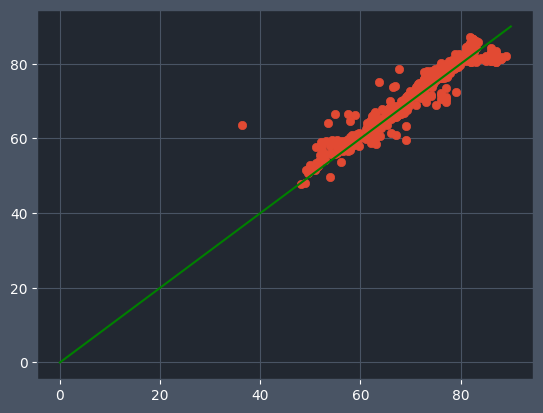

Finální RMSE nad testovacími daty: 2.679396652586421
 Finální MAE nad testovacími daty: 1.875016246112627


In [34]:
clf_final = get_opt_ridge_model(Xtrain, Xval)
Yfinal = clf_final.predict(Xtest)

RMSE_final = mean_squared_error(np.array(ytest), Yfinal, squared=False)
MAE_final = mean_absolute_error(np.array(ytest), Yfinal)

plt.scatter(yval, Yfinal)
plt.plot([0,90], [0,90], 'g')
plt.show()

print('Finální RMSE nad testovacími daty:', RMSE_final)
print(' Finální MAE nad testovacími daty:', MAE_final)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=960d33a0-31ab-4f0c-aca3-39fc15fbb130' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>